<a href="https://colab.research.google.com/github/Temmytope-seun/Text_classification/blob/main/__topic_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

## Loading Dataset

In [ ]:
url_1='https://raw.githubusercontent.com/Temmytope-seun/Text_classification/main/nyt_ai_ethics_articles.csv'
df1 = pd.read_csv(url_1, engine='python')

In [ ]:
url_2='https://raw.githubusercontent.com/Temmytope-seun/Text_classification/main/nyta_ethics_articles.csv'
df2 = pd.read_csv(url_2, engine='python')

In [ ]:
df1.head()

,headline,abstract,snippet,pub_date,web_url
0,Human Therapists Prepare for Battle Against A....,Chatbots posing as therapists may encourage us...,Chatbots posing as therapists may encourage us...,2025-02-24T10:00:15+0000,https://www.nytimes.com/2025/02/24/health/ai-t...
1,‘Eternal You’ and the Ethics of Using A.I. to ...,Examining what it means to make money by selli...,Examining what it means to make money by selli...,2025-01-24T10:00:54+0000,https://www.nytimes.com/2025/01/24/movies/eter...
2,At the Intersection of A.I. and Spirituality,Modern religious leaders are experimenting wit...,Modern religious leaders are experimenting wit...,2025-01-03T10:00:23+0000,https://www.nytimes.com/2025/01/03/technology/...
3,"A Manhunt in Manhattan, and Another Trump Pick...","Plus, the A.I. that aces weather forecasts.","Plus, the A.I. that aces weather forecasts.",2024-12-05T11:00:11+0000,https://www.nytimes.com/2024/12/05/podcasts/ma...
4,An ‘Interview’ With a Dead Luminary Exposes th...,A radio station in Poland fired its on-air tal...,A radio station in Poland fired its on-air tal...,2024-11-03T04:01:13+0000,https://www.nytimes.com/2024/11/03/world/europ...


In [ ]:
df2.head()

,headline,abstract,snippet,pub_date,web_url
0,How Artificial Intelligence Reasons,Companies like OpenAI and China’s DeepSeek off...,Companies like OpenAI and China’s DeepSeek off...,2025-03-26T22:41:45+0000,https://www.nytimes.com/2025/03/26/technology/...
1,Turing Award Goes to 2 Pioneers of Artificial ...,Andrew Barto and Richard Sutton developed rein...,Andrew Barto and Richard Sutton developed rein...,2025-03-05T10:03:27+0000,https://www.nytimes.com/2025/03/05/technology/...
2,"Not a Coder? With A.I., Just Having an Idea Ca...",I’m not a programmer. But I’ve been creating m...,I’m not a programmer. But I’ve been creating m...,2025-02-27T16:01:25+0000,https://www.nytimes.com/2025/02/27/technology/...
3,Is Artificial Intelligence Really Worth the Hype?,After the arrival of a less costly A.I. model ...,After the arrival of a less costly A.I. model ...,2025-02-07T14:00:07+0000,https://www.nytimes.com/2025/02/07/business/ai...
4,"Man Employs A.I. Avatar in Legal Appeal, and J...",The use of a video persona created with artifi...,The use of a video persona created with artifi...,2025-04-05T01:01:19+0000,https://www.nytimes.com/2025/04/04/nyregion/ai...


In [ ]:
df1.shape

(50, 5)

In [ ]:
df2.shape

(50, 5)

In [ ]:
final_df = pd.concat([df1, df2], ignore_index=True)

In [ ]:
final_df.shape

(100, 5)

In [ ]:
final_df['abstract']

,abstract
0,Chatbots posing as therapists may encourage us...
1,Examining what it means to make money by selli...
2,Modern religious leaders are experimenting wit...
3,"Plus, the A.I. that aces weather forecasts."
4,A radio station in Poland fired its on-air tal...
...,...
95,The deputy director of a liberal project at Ya...
96,The internet giant owns 14% of the high-profil...
97,An ambitious start-up embodies new optimism th...
98,“I think Google realizes that this is a once-i...


In [ ]:
!pip install pyLDAvis

In [ ]:
final_df.describe(include='all')

,headline,abstract,snippet,pub_date,web_url
count,100,97,97,100,100
unique,99,96,96,99,99
top,How Artificial Intelligence Reasons,Companies like OpenAI and China’s DeepSeek off...,Companies like OpenAI and China’s DeepSeek off...,2025-03-26T22:41:45+0000,https://www.nytimes.com/2025/03/26/technology/...
freq,2,2,2,2,2


In [ ]:
final_df['abstract']

,abstract
0,Chatbots posing as therapists may encourage us...
1,Examining what it means to make money by selli...
2,Modern religious leaders are experimenting wit...
3,"Plus, the A.I. that aces weather forecasts."
4,A radio station in Poland fired its on-air tal...
...,...
95,The deputy director of a liberal project at Ya...
96,The internet giant owns 14% of the high-profil...
97,An ambitious start-up embodies new optimism th...
98,“I think Google realizes that this is a once-i...


## Data Cleaning

In [ ]:
# !pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 8.7 MB/s eta 0:00:00


In [ ]:
# import the necessary libraries for preprocessing
import re
from string import punctuation
import contractions

#Create a function for preprocessing

def clean_text(text):
    # make text lowercase
    text = str(text).lower()
    text = re.sub(r"[’‘']", "", text)
    # expand contractions
    text = " ".join([contractions.fix(expanded_word) for expanded_word in text.split()])
    # remove text in square brackets
    text = re.sub('\[.*?\]', '', text)
    # remove links
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    # remove punctuation
    text = re.sub('[%s]' % re.escape(punctuation), '', text)
    text = re.sub(r"[’']", "", text)
    # remove new lines
    text = re.sub('\n', '', text)
    # remove words containing numbers
    text = re.sub('\w*\d\w*', '', text)
    # remove apostrophes
    text = re.sub("''", '', text)
    return text

In [ ]:
final_df['abstract_processed'] = final_df['abstract'].apply(lambda x: clean_text(x))

In [ ]:
final_df.head()

,headline,abstract,snippet,pub_date,web_url,abstract_processed
0,Human Therapists Prepare for Battle Against A....,Chatbots posing as therapists may encourage us...,Chatbots posing as therapists may encourage us...,2025-02-24T10:00:15+0000,https://www.nytimes.com/2025/02/24/health/ai-t...,chatbots posing as therapists may encourage us...
1,‘Eternal You’ and the Ethics of Using A.I. to ...,Examining what it means to make money by selli...,Examining what it means to make money by selli...,2025-01-24T10:00:54+0000,https://www.nytimes.com/2025/01/24/movies/eter...,examining what it means to make money by selli...
2,At the Intersection of A.I. and Spirituality,Modern religious leaders are experimenting wit...,Modern religious leaders are experimenting wit...,2025-01-03T10:00:23+0000,https://www.nytimes.com/2025/01/03/technology/...,modern religious leaders are experimenting wit...
3,"A Manhunt in Manhattan, and Another Trump Pick...","Plus, the A.I. that aces weather forecasts.","Plus, the A.I. that aces weather forecasts.",2024-12-05T11:00:11+0000,https://www.nytimes.com/2024/12/05/podcasts/ma...,plus the ai that aces weather forecasts
4,An ‘Interview’ With a Dead Luminary Exposes th...,A radio station in Poland fired its on-air tal...,A radio station in Poland fired its on-air tal...,2024-11-03T04:01:13+0000,https://www.nytimes.com/2024/11/03/world/europ...,a radio station in poland fired its onair tale...


### Tokenization

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
final_df['abstract_tokens'] = final_df['abstract_processed'].apply(lambda x: word_tokenize(str(x)))
final_df.head()

,headline,abstract,snippet,pub_date,web_url,abstract_processed,abstract_tokens
0,Human Therapists Prepare for Battle Against A....,Chatbots posing as therapists may encourage us...,Chatbots posing as therapists may encourage us...,2025-02-24T10:00:15+0000,https://www.nytimes.com/2025/02/24/health/ai-t...,chatbots posing as therapists may encourage us...,"[chatbots, posing, as, therapists, may, encour..."
1,‘Eternal You’ and the Ethics of Using A.I. to ...,Examining what it means to make money by selli...,Examining what it means to make money by selli...,2025-01-24T10:00:54+0000,https://www.nytimes.com/2025/01/24/movies/eter...,examining what it means to make money by selli...,"[examining, what, it, means, to, make, money, ..."
2,At the Intersection of A.I. and Spirituality,Modern religious leaders are experimenting wit...,Modern religious leaders are experimenting wit...,2025-01-03T10:00:23+0000,https://www.nytimes.com/2025/01/03/technology/...,modern religious leaders are experimenting wit...,"[modern, religious, leaders, are, experimentin..."
3,"A Manhunt in Manhattan, and Another Trump Pick...","Plus, the A.I. that aces weather forecasts.","Plus, the A.I. that aces weather forecasts.",2024-12-05T11:00:11+0000,https://www.nytimes.com/2024/12/05/podcasts/ma...,plus the ai that aces weather forecasts,"[plus, the, ai, that, aces, weather, forecasts]"
4,An ‘Interview’ With a Dead Luminary Exposes th...,A radio station in Poland fired its on-air tal...,A radio station in Poland fired its on-air tal...,2024-11-03T04:01:13+0000,https://www.nytimes.com/2024/11/03/world/europ...,a radio station in poland fired its onair tale...,"[a, radio, station, in, poland, fired, its, on..."


### Stop words removal

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'ai','may'])

def remove_stopwords(word_list):
    return[word for word in word_list if word not in stop_words]


final_df['abstract_tokens_excl_sw']=final_df['abstract_tokens'].apply(lambda x: remove_stopwords(x))
final_df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,headline,abstract,snippet,pub_date,web_url,abstract_processed,abstract_tokens,abstract_tokens_excl_sw
0,Human Therapists Prepare for Battle Against A....,Chatbots posing as therapists may encourage us...,Chatbots posing as therapists may encourage us...,2025-02-24T10:00:15+0000,https://www.nytimes.com/2025/02/24/health/ai-t...,chatbots posing as therapists may encourage us...,"[chatbots, posing, as, therapists, may, encour...","[chatbots, posing, therapists, encourage, user..."
1,‘Eternal You’ and the Ethics of Using A.I. to ...,Examining what it means to make money by selli...,Examining what it means to make money by selli...,2025-01-24T10:00:54+0000,https://www.nytimes.com/2025/01/24/movies/eter...,examining what it means to make money by selli...,"[examining, what, it, means, to, make, money, ...","[examining, means, make, money, selling, berea..."
2,At the Intersection of A.I. and Spirituality,Modern religious leaders are experimenting wit...,Modern religious leaders are experimenting wit...,2025-01-03T10:00:23+0000,https://www.nytimes.com/2025/01/03/technology/...,modern religious leaders are experimenting wit...,"[modern, religious, leaders, are, experimentin...","[modern, religious, leaders, experimenting, ea..."
3,"A Manhunt in Manhattan, and Another Trump Pick...","Plus, the A.I. that aces weather forecasts.","Plus, the A.I. that aces weather forecasts.",2024-12-05T11:00:11+0000,https://www.nytimes.com/2024/12/05/podcasts/ma...,plus the ai that aces weather forecasts,"[plus, the, ai, that, aces, weather, forecasts]","[plus, aces, weather, forecasts]"
4,An ‘Interview’ With a Dead Luminary Exposes th...,A radio station in Poland fired its on-air tal...,A radio station in Poland fired its on-air tal...,2024-11-03T04:01:13+0000,https://www.nytimes.com/2024/11/03/world/europ...,a radio station in poland fired its onair tale...,"[a, radio, station, in, poland, fired, its, on...","[radio, station, poland, fired, onair, talent,..."


### Lemmatization

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_words(word_list):
    return[lemmatizer.lemmatize(word) for word in word_list]

final_df['abstract_lemmatized'] = final_df['abstract_tokens_excl_sw'].apply(lambda x: lemmatize_words(x))
final_df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,headline,abstract,snippet,pub_date,web_url,abstract_processed,abstract_tokens,abstract_tokens_excl_sw,abstract_lemmatized
0,Human Therapists Prepare for Battle Against A....,Chatbots posing as therapists may encourage us...,Chatbots posing as therapists may encourage us...,2025-02-24T10:00:15+0000,https://www.nytimes.com/2025/02/24/health/ai-t...,chatbots posing as therapists may encourage us...,"[chatbots, posing, as, therapists, may, encour...","[chatbots, posing, therapists, encourage, user...","[chatbots, posing, therapist, encourage, user,..."
1,‘Eternal You’ and the Ethics of Using A.I. to ...,Examining what it means to make money by selli...,Examining what it means to make money by selli...,2025-01-24T10:00:54+0000,https://www.nytimes.com/2025/01/24/movies/eter...,examining what it means to make money by selli...,"[examining, what, it, means, to, make, money, ...","[examining, means, make, money, selling, berea...","[examining, mean, make, money, selling, bereav..."
2,At the Intersection of A.I. and Spirituality,Modern religious leaders are experimenting wit...,Modern religious leaders are experimenting wit...,2025-01-03T10:00:23+0000,https://www.nytimes.com/2025/01/03/technology/...,modern religious leaders are experimenting wit...,"[modern, religious, leaders, are, experimentin...","[modern, religious, leaders, experimenting, ea...","[modern, religious, leader, experimenting, ear..."
3,"A Manhunt in Manhattan, and Another Trump Pick...","Plus, the A.I. that aces weather forecasts.","Plus, the A.I. that aces weather forecasts.",2024-12-05T11:00:11+0000,https://www.nytimes.com/2024/12/05/podcasts/ma...,plus the ai that aces weather forecasts,"[plus, the, ai, that, aces, weather, forecasts]","[plus, aces, weather, forecasts]","[plus, ace, weather, forecast]"
4,An ‘Interview’ With a Dead Luminary Exposes th...,A radio station in Poland fired its on-air tal...,A radio station in Poland fired its on-air tal...,2024-11-03T04:01:13+0000,https://www.nytimes.com/2024/11/03/world/europ...,a radio station in poland fired its onair tale...,"[a, radio, station, in, poland, fired, its, on...","[radio, station, poland, fired, onair, talent,...","[radio, station, poland, fired, onair, talent,..."


In [ ]:
final_df['abstract_lemmatized'] = final_df['abstract_lemmatized'].astype(str)

## Exploratory Analysis

In [ ]:

# Exploratory Analysis: Make a simple word cloud using the wordcloud package
#import necessary library

import sys
print(sys.executable)

/usr/bin/python3


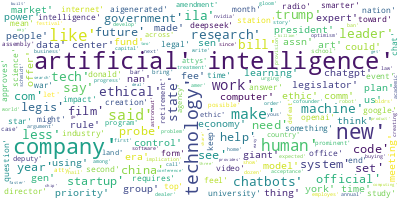

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together
long_string = ','.join(list(final_df['abstract_lemmatized'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

#Generate a word cloud
wordcloud.generate(long_string)

#Visualize the word cloud
wordcloud.to_image()

In [ ]:
#!pip install numpy==1.25.2


In [ ]:
#!pip install scipy==1.12.0

## Prepare Text for LDA Analysis

In [ ]:
import gensim
from gensim.utils import simple_preprocess


def sent_to_words(sentences):
    for sentence in sentences:
        # deacc = True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence),deacc=True))

data = final_df['abstract_lemmatized'].tolist()
data_words = list(sent_to_words(data))


In [ ]:
print(data_words[:1][0][:30])

['chatbots', 'posing', 'therapist', 'encourage', 'user', 'commit', 'harmful', 'act', 'nation', 'largest', 'psychological', 'organization', 'warned', 'federal', 'regulator']


In [ ]:
#list comprehension
#new_list = [expression for item in iterable]
#list comprehension >> for loop

import gensim.corpora as corpora

#Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency (convert each document into a bag-of words)
corpus = [id2word.doc2bow(text) for text in texts]

#View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)]


In [ ]:
#data_words contains a list of lists, where each inner list represents a document and contains preprocessed words.

type(data_words)

list

In [ ]:
print(data_words[2][:10])

['modern', 'religious', 'leader', 'experimenting', 'earlier', 'generation', 'examined', 'radio', 'television', 'internet']


## LDA Model Training

In [ ]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                      id2word=id2word,
                                      num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.010*"chatbots" + 0.010*"artificial" + 0.010*"intelligence" + '
  '0.009*"google" + 0.008*"film" + 0.007*"ila" + 0.007*"like" + '
  '0.007*"ethical" + 0.007*"official" + 0.006*"implication"'),
 (1,
  '0.012*"comm" + 0.012*"technology" + 0.011*"bill" + 0.011*"company" + '
  '0.010*"legislator" + 0.010*"ethic" + 0.008*"defeat" + 0.007*"code" + '
  '0.007*"state" + 0.007*"employes"'),
 (2,
  '0.018*"intelligence" + 0.017*"artificial" + 0.013*"capital" + 0.013*"new" + '
  '0.008*"ethic" + 0.007*"legislator" + 0.007*"us" + 0.007*"company" + '
  '0.007*"usher" + 0.007*"backer"'),
 (3,
  '0.020*"artificial" + 0.020*"intelligence" + 0.011*"control" + '
  '0.009*"company" + 0.008*"human" + 0.008*"need" + 0.008*"smarter" + '
  '0.008*"keep" + 0.007*"gloom" + 0.007*"china"'),
 (4,
  '0.010*"company" + 0.009*"intelligence" + 0.008*"make" + 0.008*"like" + '
  '0.008*"easy" + 0.008*"year" + 0.008*"human" + 0.008*"machine" + '
  '0.008*"plan" + 0.007*"legis"'),
 (5,
  '0.010*"fee" + 0.010*"b

Analyzing our LDA model

In [ ]:
import os
import pyLDAvis.gensim_models
import pickle
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

# Define the file path for saving LDA visualization data
LDAvis_data_filepath = os.path.join('content_' + str(num_topics))

# Check if the file exists
if not os.path.exists(LDAvis_data_filepath):
    # Prepare the LDA visualization data
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    # Save the prepared data to disk
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
else:
    # Load the pre-prepared pyLDAvis data from disk
    with open(LDAvis_data_filepath, 'rb') as f:
        LDAvis_prepared = pickle.load(f)

# Save the HTML visualization
pyLDAvis.save_html(LDAvis_prepared, 'content_' + str(num_topics) + '.html')

# Display the prepared LDA visualization
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.080365 -0.065781       1        1  16.680785
7     -0.052204  0.172209       2        1  14.508391
0      0.134092  0.033882       3        1  12.464552
4     -0.015445 -0.005284       4        1   9.733161
5      0.095063 -0.037232       5        1   9.579935
6     -0.066379 -0.034189       6        1   8.828920
1      0.004120 -0.043476       7        1   7.873839
2     -0.023598 -0.027760       8        1   7.398106
8      0.010342 -0.005292       9        1   6.537229
9     -0.005627  0.012923      10        1   6.395082, topic_info=             Term       Freq      Total Category  logprob  loglift
28             ai  16.000000  16.000000  Default  30.0000  30.0000
500           ila   3.000000   3.000000  Default  29.0000  29.0000
649       company   4.000000   4.000000  Default  28.0000  28.0000
89   intelligence  13.000000  13.000000  Default  27.0000  27.0000
83     artificial  12.000000  12.000000  Default  26.0000  26.0000
..            ...        ...        ...      ...      ...      ...
89   intelligence   0.600974  13.081025  Topic10  -4.9937  -0.3307
227    government   0.600971   2.659334  Topic10  -4.9937   1.2624
131       control   0.600951   2.506069  Topic10  -4.9938   1.3217
69     technology   0.600929   6.016491  Topic10  -4.9938   0.4459
49      generated   0.600928   2.663743  Topic10  -4.9938   1.2606

[499 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
881       9  0.946781        academic
261       4  0.611282          across
261       9  0.611282          across
0         4  0.864517            acts
810       4  0.864523  administration
...     ...       ...             ...
312       4  0.430558            york
312       9  0.430558            york
259       3  0.763676             yrs
414       3  0.763671        zaretzki
573      10  0.890297            zorn

[560 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 8, 1, 5, 6, 7, 2, 3, 9, 10])

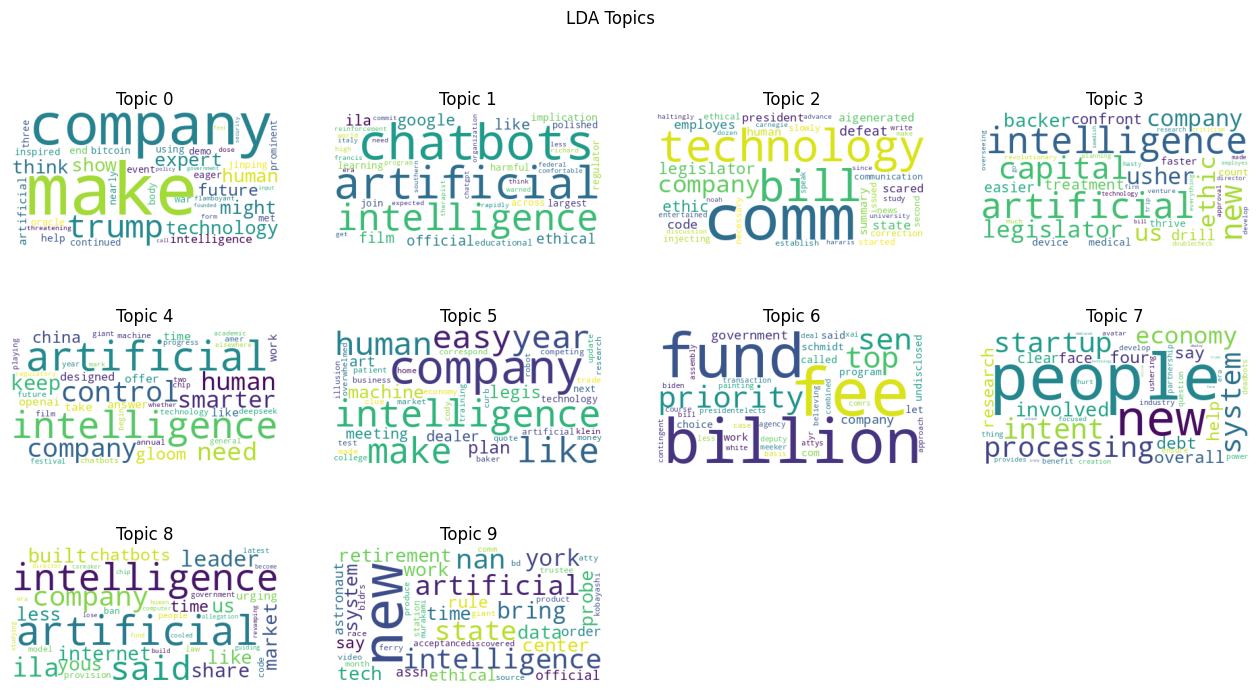

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.tight_layout(pad=3.0)
plt.suptitle('LDA Topics')

num_topics = lda_model.num_topics

num_cols = 4
num_rows = (num_topics - 1) // num_cols + 1

for i in range(num_topics):
    plt.subplot(num_rows, num_cols, i + 1)
    wc = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue').fit_words(dict(lda_model.show_topic(i-1, topn=40)))
    plt.imshow(wc)
    plt.title("Topic " + str(i))
    plt.axis("off")


#BerTopic

In [ ]:
# install dependecies
!pip install bertopic
!pip install flair
!apt-get -qq install -y libfluidsynth1

  Using cached flair-0.15.1-py3-none-any.whl.metadata (12 kB)
  Using cached boto3-1.37.36-py3-none-any.whl.metadata (6.7 kB)
  Using cached conllu-4.5.3-py2.py3-none-any.whl.metadata (19 kB)
  Using cached ftfy-6.3.1-py3-none-any.whl.metadata (7.3 kB)
  Using cached langdetect-1.0.9.tar.gz (981 kB)
  Preparing metadata (setup.py) ... done
  Using cached mpld3-0.5.10-py3-none-any.whl.metadata (5.1 kB)
  Using cached pptree-3.1.tar.gz (3.0 kB)
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# import the necessary libraries
# Topic model
from bertopic import BERTopic
# Dimension reduction
from umap import UMAP
# Clustering
from hdbscan import HDBSCAN
from sklearn.cluster import KMeans
# Count vectorization
from sklearn.feature_extraction.text import CountVectorizer
# Sentence transformer
from sentence_transformers import SentenceTransformer
# Flair
from transformers.pipelines import pipeline
from flair.embeddings import TransformerDocumentEmbeddings, WordEmbeddings, DocumentPoolEmbeddings, StackedEmbeddings

In [ ]:

# Initiate UMAP
umap_model = UMAP(n_neighbors=15,
                  n_components=5,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=100)
# Clustering model
# hdbscan_model = HDBSCAN(min_cluster_size=5, min_samples = 5,
# metric='euclidean', prediction_data=True)
kmeans_model = KMeans(n_clusters=9)
# Initiate a sentence transformer model
sentence_model = SentenceTransformer("paraphrase-albert-small-v2")
# Initiate a pretrained model
hf_model = pipeline("feature-extraction", model="distilroberta-base")

# Initiate a pretrained embedding model
roberta_model = TransformerDocumentEmbeddings('roberta-base')
# Initiate another pretrained embedding model
glove_embedding = WordEmbeddings('crawl')
document_glove_embeddings = DocumentPoolEmbeddings([glove_embedding])
# Stack the two pretrained embedding models
stacked_embeddings = StackedEmbeddings(embeddings=[roberta_model,
document_glove_embeddings])

# Count vectorizer
vectorizer_model = CountVectorizer(min_df=10)

# Initiate BERTopic
# topic_model = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True,hdbscan_model=kmeans_model,
#                        embedding_model=stacked_embeddings,min_topic_size=5, n_gram_range=(1, 3),diversity=0.8)#vectorizer_model=vectorizer_model)# Other options for embedding_model are sentence_model, hf_model,roberta_model

# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True,hdbscan_model=kmeans_model, n_gram_range=(1, 3))
# Run BERTopic model
topics, probabilities = topic_model.fit_transform(final_df['abstract_lemmatized'])#abstract_lemmatized

In [ ]:
# Get the list of topics
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,0,15,0_artificial intelligence_artificial_intellige...,"[artificial intelligence, artificial, intellig...","[['“', 'thinking', 'machine', '”', 'journalist..."
1,1,14,1_trump_technology_director_donald,"[trump, technology, director, donald, donald t...","[['four', 'people', 'involved', 'creation', 'i..."
2,2,13,2_intelligence_artificial_artificial intellige...,"[intelligence, artificial, artificial intellig...","[['artificial', 'intelligence', 'made', 'trip'..."
3,3,13,3_company_market_company set make_billion,"[company, market, company set make, billion, p...","[['deal', 'combined', 'two', 'mr', 'musk', 'co..."
4,4,11,4_state_ethic_ila_code,"[state, ethic, ila, code, official, bill, fee,...","[['white', 'house', 'disturbed', 'ethical', 'i..."
5,5,10,5_chatbots_like_take time_openai china,"[chatbots, like, take time, openai china, deep...","[['chatbots', 'posing', 'therapist', 'encourag..."
6,6,10,6_leader_ethical_radio_university,"[leader, ethical, radio, university, station, ...","[['documentary', '“', 'roadrunner', '”', 'morg..."
7,7,8,7_legis_plan_film_dealer,"[legis, plan, film, dealer, festival, meeting,...","[['amer', 'film', 'festival', 'annual', 'festi..."
8,8,6,8_gloom_write_year_ace,"[gloom, write, year, ace, released thursday, n...","[['prediction', 'world', 'torn', 'optimism', '..."


In [ ]:
# prompt: how to remove words with 'nan'

# Assuming 'final_df' is your DataFrame and 'abstract_lemmatized' is the column with the text data.
final_df['abstract_lemmatized'] = final_df['abstract_lemmatized'].astype(str).apply(lambda x: ' '.join([word for word in x.split() if 'nan' not in word]))


In [ ]:
# Get top 10 terms for a topic
topic_model.get_topic(0)

[('artificial intelligence', 0.043955526391530136),
 ('artificial', 0.043301994466447086),
 ('intelligence', 0.042680221089580694),
 ('human', 0.03135009104933917),
 ('technology', 0.023717523300749655),
 ('control', 0.023340922810173016),
 ('help', 0.02200715047342212),
 ('tech', 0.02097493630715953),
 ('machine', 0.02097493630715953),
 ('company', 0.02050760153793139)]

In [ ]:
# Visualize top topic keywords
topic_model.visualize_barchart(top_n_topics=12)

In [ ]:
# Visualize term rank decrease
topic_model.visualize_term_rank()

In [ ]:
# Visualize intertopic distance
topic_model.visualize_topics()

In [ ]:
# Visualize connections between topics using hierachical clustering
topic_model.visualize_hierarchy(top_n_topics=10)

In [ ]:
# Visualize similarity using heatmap
topic_model.visualize_heatmap()

In [ ]:
# Get the topic predictions
topic_prediction = topic_model.topics_[:]
# Save the predictions in the dataframe
final_df['topic_prediction'] = topic_prediction
# Take a look at the data
final_df.head()

,headline,abstract,snippet,pub_date,web_url,abstract_processed,abstract_tokens,abstract_tokens_excl_sw,abstract_lemmatized,topic_prediction
0,Human Therapists Prepare for Battle Against A....,Chatbots posing as therapists may encourage us...,Chatbots posing as therapists may encourage us...,2025-02-24T10:00:15+0000,https://www.nytimes.com/2025/02/24/health/ai-t...,chatbots posing as therapists may encourage us...,"[chatbots, posing, as, therapists, may, encour...","[chatbots, posing, therapists, encourage, user...","['chatbots', 'posing', 'therapist', 'encourage...",5
1,‘Eternal You’ and the Ethics of Using A.I. to ...,Examining what it means to make money by selli...,Examining what it means to make money by selli...,2025-01-24T10:00:54+0000,https://www.nytimes.com/2025/01/24/movies/eter...,examining what it means to make money by selli...,"[examining, what, it, means, to, make, money, ...","[examining, means, make, money, selling, berea...","['examining', 'mean', 'make', 'money', 'sellin...",2
2,At the Intersection of A.I. and Spirituality,Modern religious leaders are experimenting wit...,Modern religious leaders are experimenting wit...,2025-01-03T10:00:23+0000,https://www.nytimes.com/2025/01/03/technology/...,modern religious leaders are experimenting wit...,"[modern, religious, leaders, are, experimentin...","[modern, religious, leaders, experimenting, ea...","['modern', 'religious', 'leader', 'experimenti...",6
3,"A Manhunt in Manhattan, and Another Trump Pick...","Plus, the A.I. that aces weather forecasts.","Plus, the A.I. that aces weather forecasts.",2024-12-05T11:00:11+0000,https://www.nytimes.com/2024/12/05/podcasts/ma...,plus the ai that aces weather forecasts,"[plus, the, ai, that, aces, weather, forecasts]","[plus, aces, weather, forecasts]","['plus', 'ace', 'weather', 'forecast']",8
4,An ‘Interview’ With a Dead Luminary Exposes th...,A radio station in Poland fired its on-air tal...,A radio station in Poland fired its on-air tal...,2024-11-03T04:01:13+0000,https://www.nytimes.com/2024/11/03/world/europ...,a radio station in poland fired its onair tale...,"[a, radio, station, in, poland, fired, its, on...","[radio, station, poland, fired, onair, talent,...","['radio', 'station', 'poland', 'fired', 'onair...",6


In [ ]:
# New data for the review
new_review = "I like the new headphone. Its sound quality is great."
# Find topics
num_of_topics = 3
similar_topics, similarity = topic_model.find_topics(new_review, top_n=num_of_topics);
# Print results
print(f'The top {num_of_topics} similar topics are {similar_topics}, and the similarities are {np.round(similarity,2)}')

The top 3 similar topics are [3, 5, 2], and the similarities are [0.08 0.06 0.06]


In [ ]:
# Print the top keywords for the top similar topics
for i in range(num_of_topics):
  print(f'The top keywords for topic {similar_topics[i]} are:')
  print(topic_model.get_topic(similar_topics[i]))

The top keywords for topic 3 are:
[('company', 0.04517703985856063), ('market', 0.029382102831629564), ('company set make', 0.02116926549614805), ('billion', 0.02116926549614805), ('problem', 0.02116926549614805), ('buying', 0.02116926549614805), ('company set', 0.02116926549614805), ('set make', 0.02116926549614805), ('capital', 0.02116926549614805), ('share', 0.02116926549614805)]
The top keywords for topic 5 are:
[('chatbots', 0.07334373153157091), ('like', 0.03946423226210931), ('take time', 0.03528210916024675), ('openai china', 0.03528210916024675), ('deepseek', 0.03528210916024675), ('deepseek offer', 0.03528210916024675), ('answer work', 0.03528210916024675), ('answer', 0.03528210916024675), ('designed take', 0.03528210916024675), ('deepseek offer chatbots', 0.03528210916024675)]
The top keywords for topic 2 are:
[('intelligence', 0.05204311859356279), ('artificial', 0.0462011308481038), ('artificial intelligence', 0.04019864379396346), ('new', 0.02916450613545932), ('toward', 

In [ ]:
# Save the topic model
topic_model.save("ai_artcles_topic_model")
# Load the topic model
my_model = BERTopic.load("ai_artcles_topic_model")

2025-04-18 16:38:55,174 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.
